In [19]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_rows', 120)

time: 4.36 ms (started: 2021-01-11 12:45:27 +00:00)


In [5]:
!pip install ipython-autotime

In [6]:
%load_ext autotime

time: 178 µs (started: 2021-01-11 12:43:13 +00:00)


In [45]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          'axes.labelsize' : 15,
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
          "axes.titlecolor": "w", 
          'figure.figsize': [20, 8], 
          'axes.prop_cycle': plt.cycler(color=color_list), 
          'figure.dpi' : 75, 
          'legend.fontsize': 10,
          'font.size': 15 
          }
plt.rcParams.update(params)

time: 6.2 ms (started: 2021-01-11 13:29:37 +00:00)


In [1]:
!gdown "https://drive.google.com/uc?id=1ADe4UbTRDdiJHrW-Og6E5UhTtdMvBnnL"

Downloading...
From: https://drive.google.com/uc?id=1ADe4UbTRDdiJHrW-Og6E5UhTtdMvBnnL
To: /content/featured_dataset_final_2013_2019_10_01.csv
100% 1.72M/1.72M [00:00<00:00, 52.1MB/s]


In [3]:
!gdown "https://drive.google.com/uc?id=1nTpNYwwCKmhy5x0bGb17gDR4Sbi48ete"

Downloading...
From: https://drive.google.com/uc?id=1nTpNYwwCKmhy5x0bGb17gDR4Sbi48ete
To: /content/featured_dataset_final_2013_2019.csv
100% 1.46M/1.46M [00:00<00:00, 97.3MB/s]


In [7]:
df_2 = pd.read_csv('featured_dataset_final_2013_2019.csv', index_col = 0)
df_2['DATE'] = pd.to_datetime(df_2['DATE'])
df_2.set_index('DATE', inplace=True)
df_2.head()

,UNIQUE_CARRIER_NAME,194,26,339,35,359,406,416,461,482,530,608,612,614,616,617,619,622,623,624,625,626,627,629,631,634,637,638,644,650,654,655,656,673,674,675,676,677,678,687,...,Price,TOP1_DEST,TOP1_PRCP,TOP1_SNOW,TOP1_TAVG,TOP1_TMAX,TOP1_TSUN,TOP1_WSPD,TOP2_DEST,TOP2_PRCP,TOP2_SNOW,TOP2_TAVG,TOP2_TMAX,TOP2_TSUN,TOP2_WSPD,TOP3_DEST,TOP3_PRCP,TOP3_SNOW,TOP3_TAVG,TOP3_TMAX,TOP3_TSUN,TOP3_WSPD,TOP4_DEST,TOP4_PRCP,TOP4_SNOW,TOP4_TAVG,TOP4_TMAX,TOP4_TSUN,TOP4_WSPD,TOP5_DEST,TOP5_PRCP,TOP5_SNOW,TOP5_TAVG,TOP5_TMAX,TOP5_TSUN,TOP5_WSPD,TOP_1_DEST_FQ,UNEMPLOYMENT,LOAD_FACTOR,LOAD_FACTOR_SHIFTED
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,Air Wisconsin Airlines Corp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,97.41,"Charlotte, NC",150.7,0.0,24.723333,34.4,0.0,10.083333,"Philadelphia, PA",83.1,6.428571,2.657143,19.4,0.0,15.271429,"Washington, DC",126.3,0.000000,21.138710,33.9,0.0,13.696774,"Boston, MA",100.0,0.000000,20.596667,35.6,0.0,14.920000,"Scranton/Wilkes-Barre, PA",68.3,0.000000,9.263333,25.6,0.0,12.000000,0.155556,7.8%,0.694164,0.649511
2013-01-01,Alaska Airlines Inc.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.167,0.356,0.0,0.333,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.144,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,97.41,"Seattle, WA",154.6,0.0,6.664516,15.0,0.0,15.012903,"Anchorage, AK",20.9,465.483871,-2.345161,5.6,0.0,8.900000,"Portland, OR",387.2,0.000000,6.174194,17.2,0.0,17.035484,"Juneau, AK",256.4,0.000000,7.148387,13.3,0.0,12.970968,"Palm Springs, CA",0.0,0.000000,22.246667,38.7,0.0,8.663333,0.247748,7.8%,0.829975,0.833743
2013-01-01,Allegiant Air,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.048,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.012,0.940,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,97.41,"Las Vegas, NV",0.0,0.0,18.003226,30.6,0.0,12.561290,"Sanford, FL",22.6,0.000000,18.467742,30.0,0.0,12.616129,"Phoenix, AZ",7.8,0.000000,13.846429,26.7,0.0,8.528571,"Wendover, UT",26.9,0.000000,3.453333,16.7,0.0,9.610000,"St. Petersburg, FL",200.8,0.000000,27.400000,35.0,0.0,9.513333,0.097510,7.8%,0.868898,0.892041
2013-01-01,American Airlines Inc.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.335,0.0,0.000,0.0,0.173,0.000,0.000,0.041,0.059,0.027,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.000,0.364,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,97.41,"Dallas/Fort Worth, TX",88.6,0.0,10.266667,28.3,0.0,16.222581,"Chicago, IL",45.3,0.000000,13.587097,26.7,0.0,18.080645,"Miami, FL",157.2,0.000000,27.890000,33.3,14733.0,12.210000,"Los Angeles, CA",31.7,0.000000,15.132258,28.3,0.0,7.029032,"New York, NY",128.8,21.935484,4.290323,22.8,0.0,20.238710,0.198728,7.8%,0.801683,0.783544
2013-01-01,Delta Air Lines Inc.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026,0.120,0.0,0.000,0.0,0.115,0.025,0.005,0.000,0.035,0.005,0.0,0.0,0.000,0.0,0.0,0.0,0.04,0.000,0.141,0.073,0.0,0.0,0.0,0.0,0.0,0.0,0.016,...,97.41,"Atlanta, GA",149.7,0.0,17.023333,28.9,0.0,14.503333,"Minneapolis, MN",56.3,66.333333,3.196667,28.9,0.0,15.380000,"Detroit, MI",37.8,71.612903,-2.496774,14.4,0.0,15.729032,"Salt Lake City, UT",27.1,41.071429,4.014286,16.7,0.0,13.575000,"New York, NY",128.8,21.935484,4.290323,22.8,0.0,20.238710,0.183770,7.8%,0.804674,0.794658


time: 216 ms (started: 2021-01-11 12:43:13 +00:00)


In [27]:
carriers = np.unique(df_2['UNIQUE_CARRIER_NAME'])
dataframe_collection = {} 
for carrier in carriers:
  if carrier != 'US Airways Inc.':
    dataframe_collection[carrier] = df_2[df_2['UNIQUE_CARRIER_NAME'] == carrier]
dataframe_collection['Air Wisconsin Airlines Corp'].head()

,UNIQUE_CARRIER_NAME,194,26,339,35,359,406,416,461,482,530,608,612,614,616,617,619,622,623,624,625,626,627,629,631,634,637,638,644,650,654,655,656,673,674,675,676,677,678,687,...,Price,TOP1_DEST,TOP1_PRCP,TOP1_SNOW,TOP1_TAVG,TOP1_TMAX,TOP1_TSUN,TOP1_WSPD,TOP2_DEST,TOP2_PRCP,TOP2_SNOW,TOP2_TAVG,TOP2_TMAX,TOP2_TSUN,TOP2_WSPD,TOP3_DEST,TOP3_PRCP,TOP3_SNOW,TOP3_TAVG,TOP3_TMAX,TOP3_TSUN,TOP3_WSPD,TOP4_DEST,TOP4_PRCP,TOP4_SNOW,TOP4_TAVG,TOP4_TMAX,TOP4_TSUN,TOP4_WSPD,TOP5_DEST,TOP5_PRCP,TOP5_SNOW,TOP5_TAVG,TOP5_TMAX,TOP5_TSUN,TOP5_WSPD,TOP_1_DEST_FQ,UNEMPLOYMENT,LOAD_FACTOR,LOAD_FACTOR_SHIFTED
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,Air Wisconsin Airlines Corp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,97.41,"Charlotte, NC",150.7,0.000000,24.723333,34.4,0.0,10.083333,"Philadelphia, PA",83.1,6.428571,2.657143,19.4,0.0,15.271429,"Washington, DC",126.3,0.0,21.138710,33.9,0.0,13.696774,"Boston, MA",100.0,0.000000,20.596667,35.6,0.0,14.920000,"Scranton/Wilkes-Barre, PA",68.3,0.0,9.263333,25.6,0.0,12.000000,0.155556,7.8%,0.694164,0.649511
2013-02-01,Air Wisconsin Airlines Corp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,91.83,"Philadelphia, PA",98.0,2.580645,6.132258,25.0,0.0,16.980645,"Charlotte, NC",89.7,0.000000,27.180645,36.7,0.0,8.435484,"Washington, DC",108.5,0.0,24.400000,35.6,0.0,14.690000,"Greer, SC",239.5,0.000000,23.886667,34.4,0.0,9.306667,"Boston, MA",44.1,0.0,12.241935,24.4,0.0,18.564516,0.165468,7.9%,0.733276,0.680295
2013-03-01,Air Wisconsin Airlines Corp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,97.23,"Charlotte, NC",208.2,0.000000,25.648387,35.6,0.0,7.877419,"Philadelphia, PA",76.8,0.000000,14.786667,27.8,0.0,16.616667,"Washington, DC",165.1,0.0,27.629032,37.2,0.0,11.629032,"Boston, MA",52.5,0.000000,9.303333,24.4,0.0,16.436667,"Buffalo, NY",127.9,0.0,18.540000,28.9,0.0,14.853333,0.167286,7.7%,0.746661,0.715044
2013-04-01,Air Wisconsin Airlines Corp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,93.13,"Philadelphia, PA",132.7,0.000000,18.722581,32.2,0.0,14.058065,"Washington, DC",50.6,0.000000,26.254839,36.7,0.0,11.741935,"Charlotte, NC",4.8,0.0,25.850000,36.7,0.0,8.633333,"Boston, MA",108.7,0.000000,7.112903,20.6,0.0,14.458065,"Buffalo, NY",61.6,0.0,21.696774,32.8,0.0,12.583871,0.161616,7.6%,0.774147,0.739219
2013-05-01,Air Wisconsin Airlines Corp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,91.61,"Washington, DC",6.5,0.000000,24.320000,36.7,0.0,12.486667,"Charlotte, NC",152.5,0.000000,19.729032,37.2,0.0,10.190323,"Philadelphia, PA",201.8,0.0,23.070000,34.4,0.0,14.620000,"Baltimore, MD",24.3,4.516129,2.245161,17.8,0.0,10.154839,"Boston, MA",83.1,0.0,0.135484,14.4,0.0,19.819355,0.155340,7.5%,0.774738,0.759128


time: 159 ms (started: 2021-01-11 12:54:15 +00:00)


In [9]:
def label_encoding(data):
  le = LabelEncoder()
  for column_name in data.columns:
      if data[column_name].dtype == object:
          data[column_name] = le.fit_transform(data[column_name])
      else:
          pass
  return data

time: 5.28 ms (started: 2021-01-11 12:43:18 +00:00)


In [33]:
win_length = 2
batch_size = 2
num_features = 103

time: 1.36 ms (started: 2021-01-11 13:26:16 +00:00)


In [34]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])

time: 896 ms (started: 2021-01-11 13:26:17 +00:00)


In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 2, 128)            118784    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 2, 128)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 2, 128)            131584    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 2, 128)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 128)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)               

In [36]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(win_length, num_features)))
model2.add(tf.keras.layers.LSTM(128, return_sequences=True))
model2.add(tf.keras.layers.LSTM(256, return_sequences=True))
model2.add(tf.keras.layers.LSTM(128, return_sequences=True))
model2.add(tf.keras.layers.LSTM(64, return_sequences=True))
model2.add(tf.keras.layers.LSTM(num_features, return_sequences=False)) 
model2.add(tf.keras.layers.Dense(1))

model2.compile(loss=tf.losses.MeanAbsoluteError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])

time: 1.72 s (started: 2021-01-11 13:26:19 +00:00)


In [37]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 2, 64)             43008     
_________________________________________________________________
lstm_13 (LSTM)               (None, 2, 128)            98816     
_________________________________________________________________
lstm_14 (LSTM)               (None, 2, 256)            394240    
_________________________________________________________________
lstm_15 (LSTM)               (None, 2, 128)            197120    
_________________________________________________________________
lstm_16 (LSTM)               (None, 2, 64)             49408     
_________________________________________________________________
lstm_17 (LSTM)               (None, 103)               69216     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [42]:
def LSTM_forecast(dataframe_collection, win_length, batch_size, num_features, model_LSTM):
  predictions = {}
  for dataframe in dataframe_collection:
    print('Predicting the carrier ' + dataframe + '....')
    df = dataframe_collection[dataframe].copy()
    df = label_encoding(df)
    df.pop('UNIQUE_CARRIER_NAME')
    df.pop('LOAD_FACTOR_SHIFTED')
    X = df.copy()
    y = df['LOAD_FACTOR'].copy()
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df)
    features = data_scaled[:, :-1]
    target = data_scaled[:, -1]
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state = 12, shuffle = False)
    y_test = np.zeros(y_test.shape[0])
    print(y_test)
    train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
    test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)
    model_LSTM.fit(train_generator, epochs = 50, shuffle=False, verbose = 0)
    predictions_tmp = model_LSTM.predict(test_generator)
    df_pred = pd.concat([pd.DataFrame(x_test[win_length:]), pd.DataFrame(predictions_tmp)], axis=1)
    df_pred.columns = range(len(df_pred.columns))
    rev_trans = scaler.inverse_transform(df_pred)
    df_final = df[predictions_tmp.shape[0]*-1:]
    df_final['PRED'] = rev_trans[:, -1]
    tmp = df_final[['LOAD_FACTOR', 'PRED']]
    predictions[dataframe] = tmp
    print('METRIC TEMPORAIRE :' + str(mean_absolute_error(df_final['PRED'], df_final['LOAD_FACTOR'])))
    plt.plot(df_final.index, df_final['LOAD_FACTOR'], label='True Load Factor')
    plt.plot(df_final.index, df_final['PRED'], label='Predicted Load Factor')
    plt.title('Predictions for the carrier : ' + dataframe)
    plt.show()
  return predictions

time: 30.3 ms (started: 2021-01-11 13:28:01 +00:00)


Predicting the carrier Air Wisconsin Airlines Corp....
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
METRIC TEMPORAIRE :0.03630279026505267


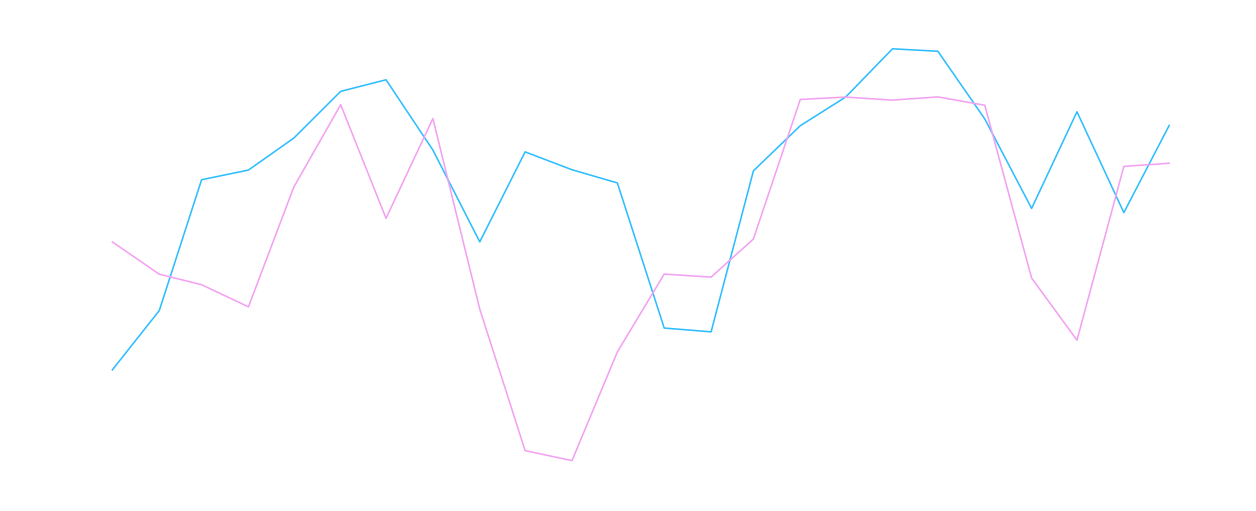

Predicting the carrier Alaska Airlines Inc.....
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
METRIC TEMPORAIRE :0.03133328134792584


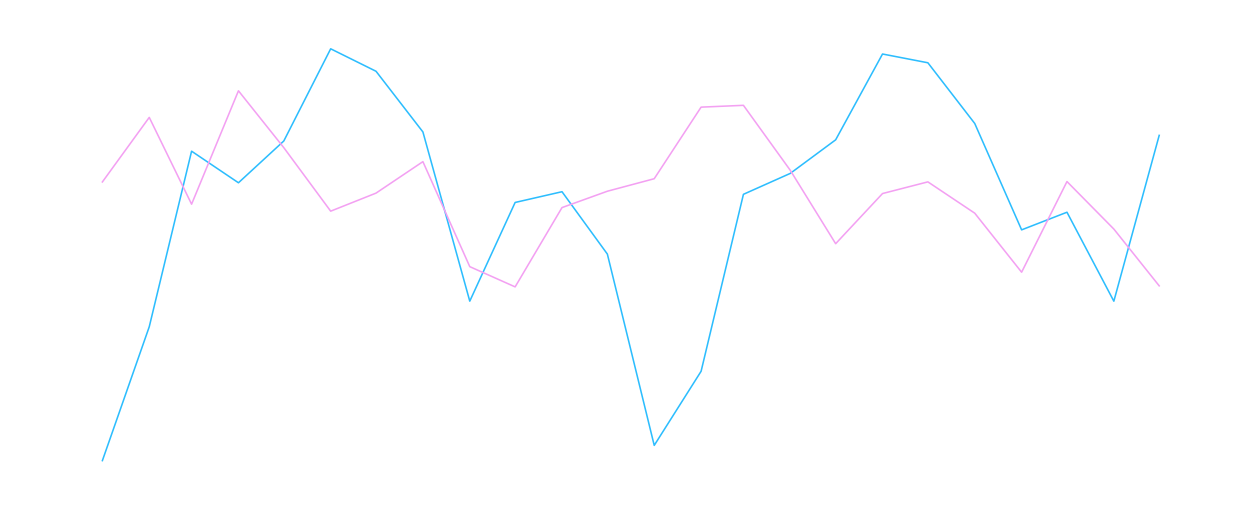

Predicting the carrier Allegiant Air....
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
METRIC TEMPORAIRE :0.02588080984727767


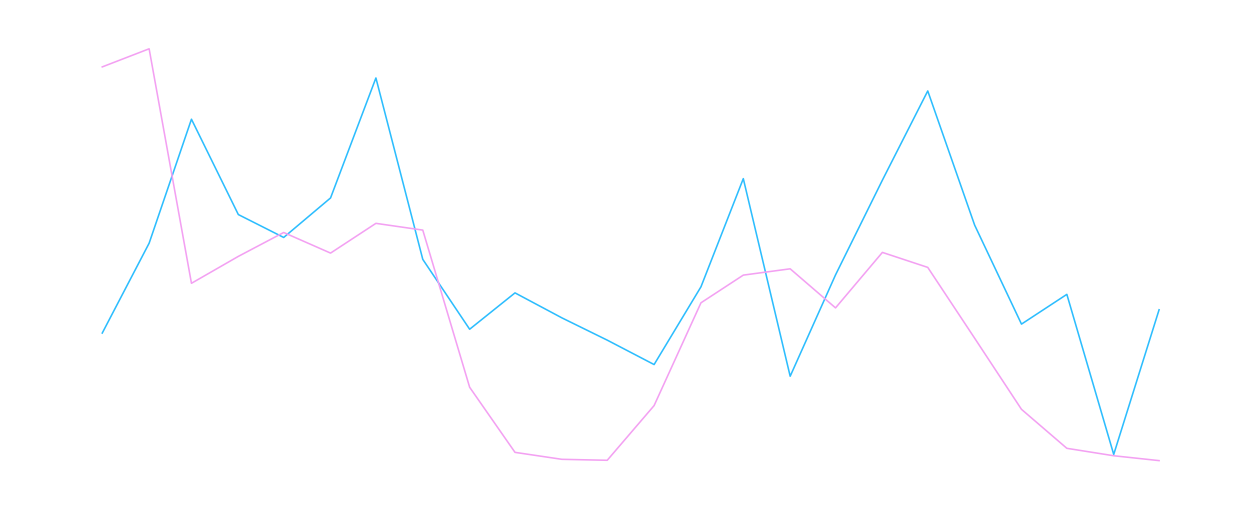

Predicting the carrier American Airlines Inc.....
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
METRIC TEMPORAIRE :0.03332647133826542


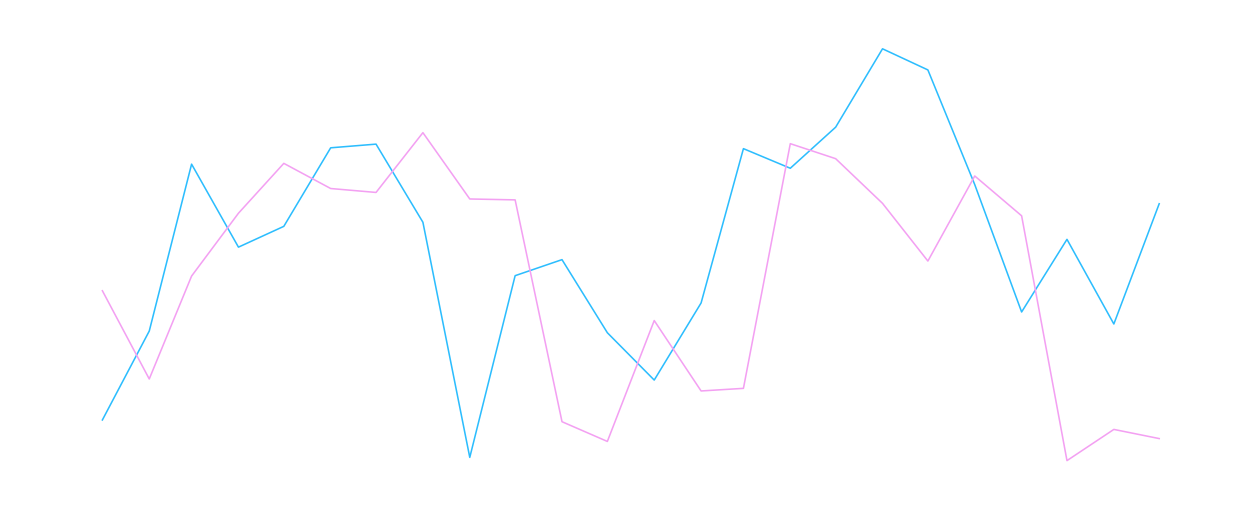

Predicting the carrier Delta Air Lines Inc.....
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
METRIC TEMPORAIRE :0.022884829208900167


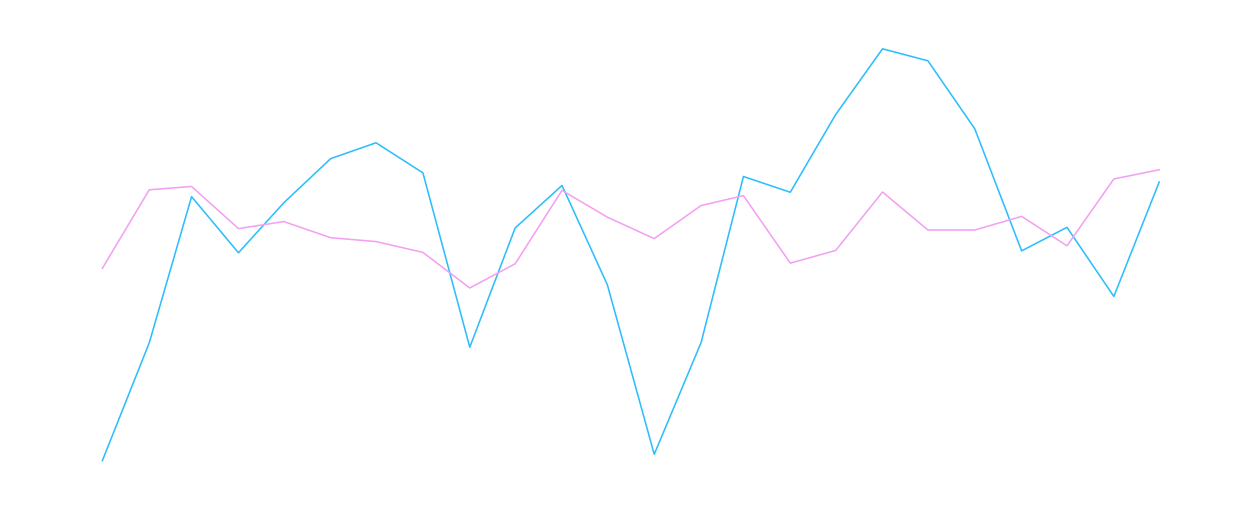

Predicting the carrier Endeavor Air Inc.....
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
METRIC TEMPORAIRE :0.029616528318769167


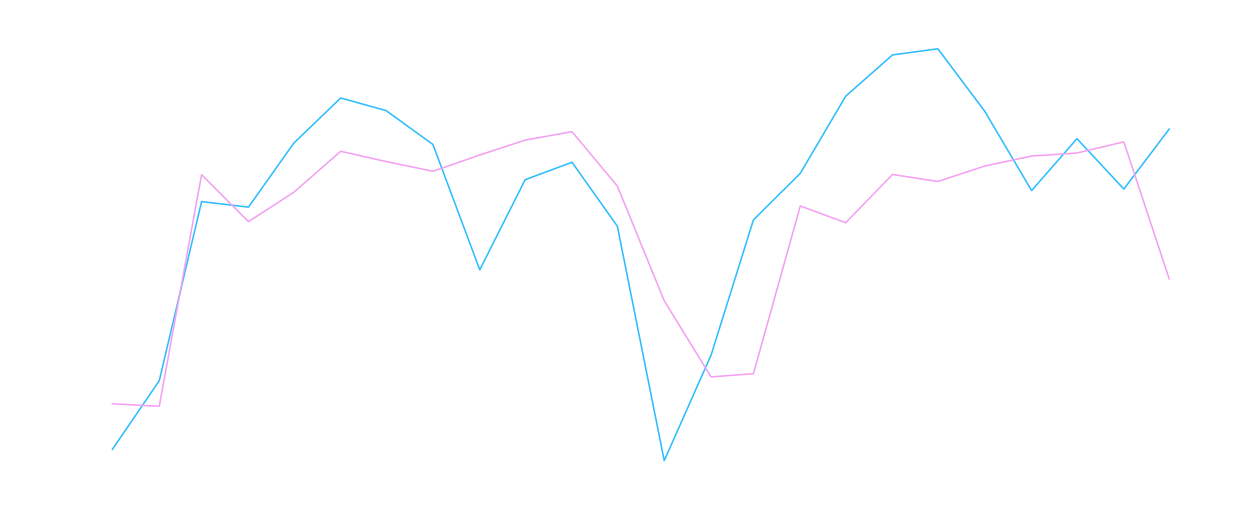

Predicting the carrier Envoy Air....
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
METRIC TEMPORAIRE :0.028980494890502844


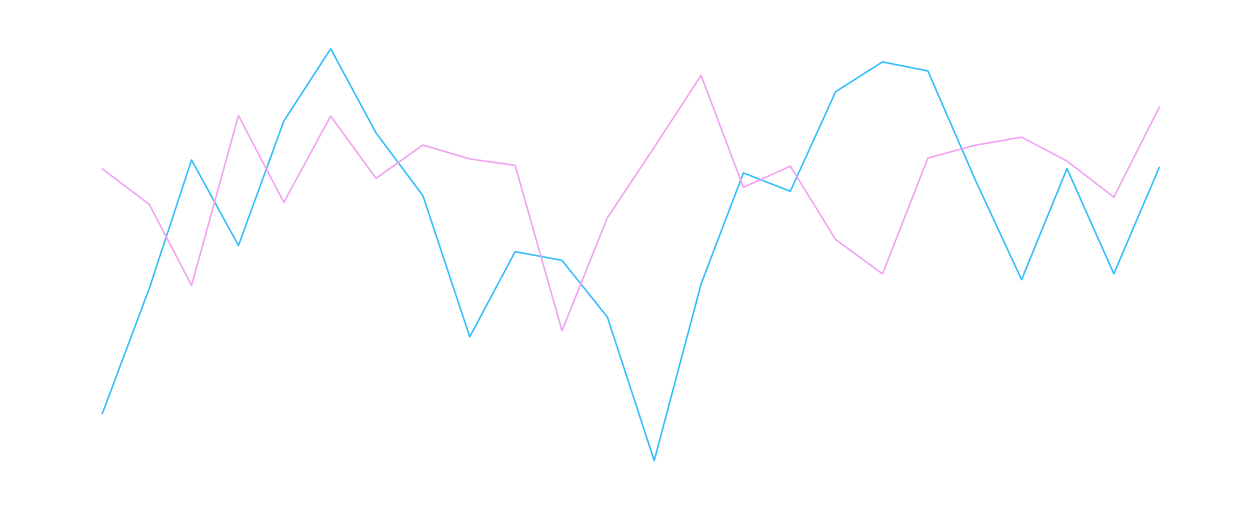

Predicting the carrier ExpressJet Airlines LLC....
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
METRIC TEMPORAIRE :0.0349752682150015


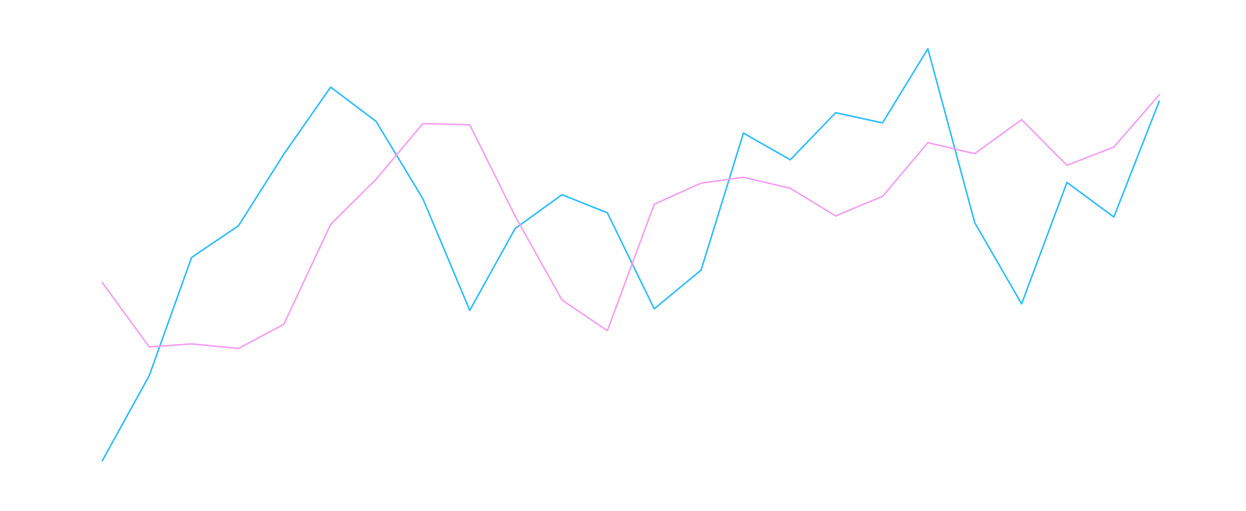

Predicting the carrier Frontier Airlines Inc.....
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
METRIC TEMPORAIRE :0.025467409570225762


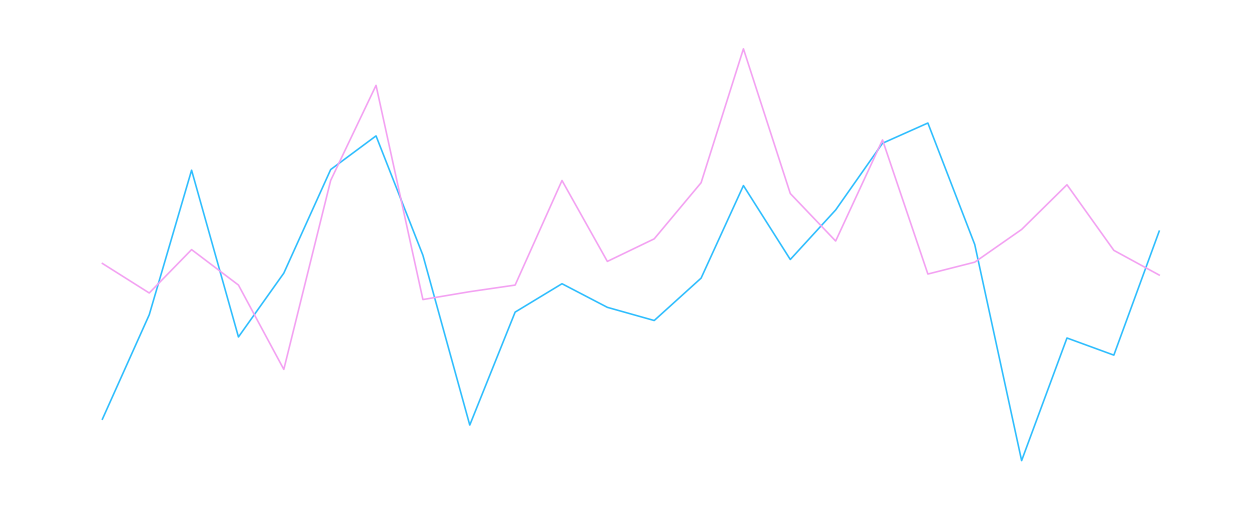

Predicting the carrier GoJet Airlines LLC d/b/a United Express....
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
METRIC TEMPORAIRE :0.02846570130447475


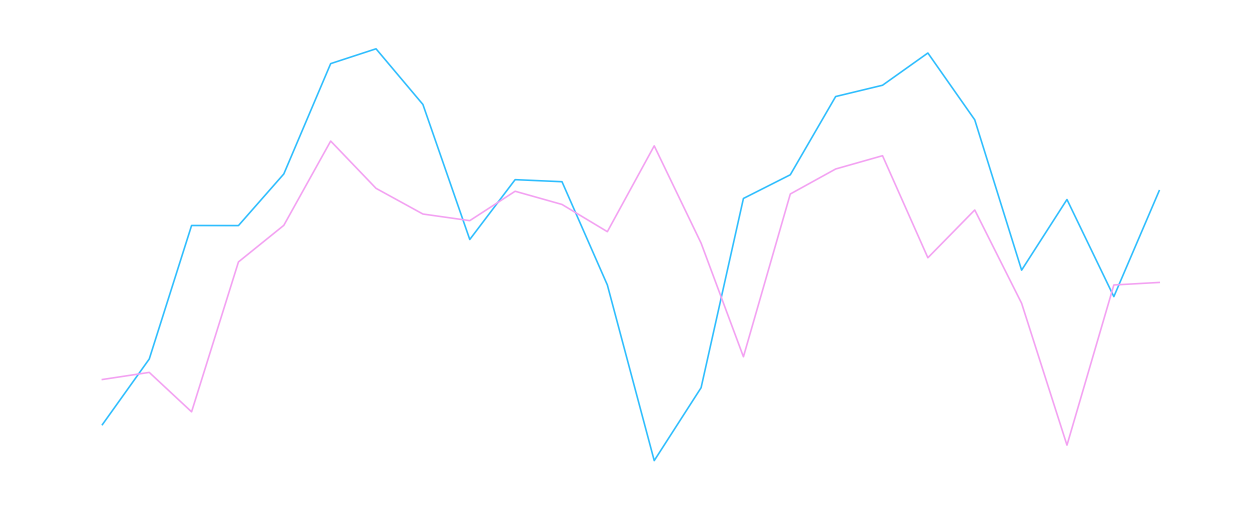

Predicting the carrier Grant Aviation....
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
METRIC TEMPORAIRE :0.03765319906447947


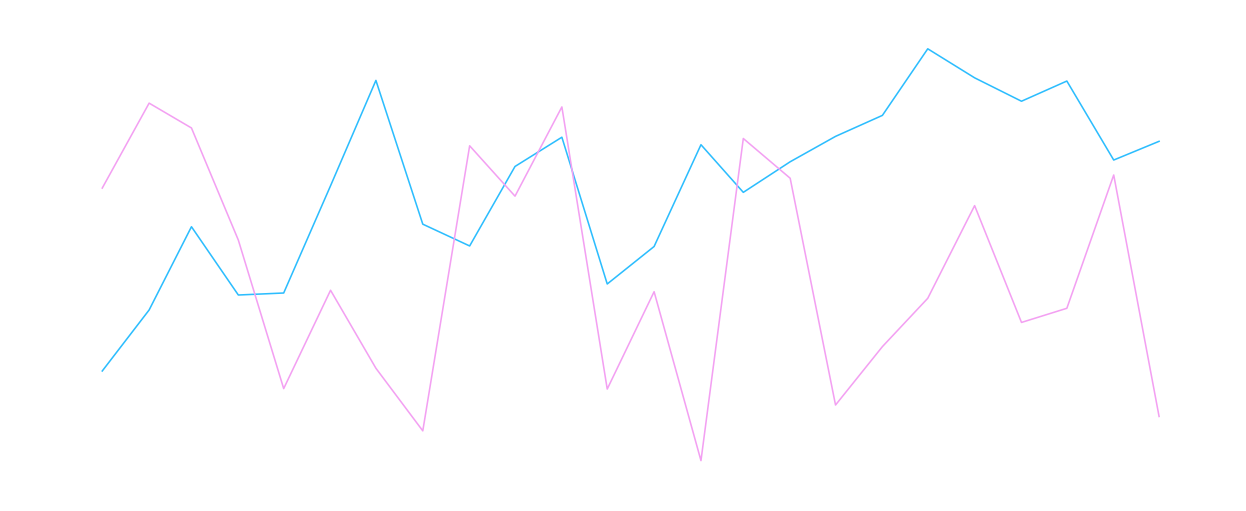

Predicting the carrier JetBlue Airways....
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
METRIC TEMPORAIRE :0.024326859624205468


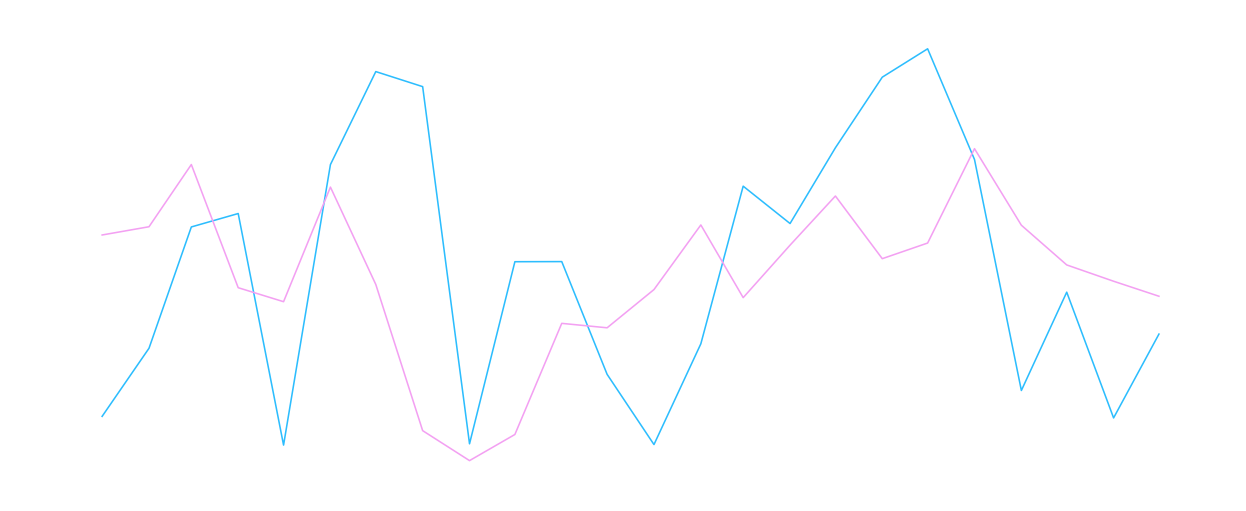

Predicting the carrier Mesa Airlines Inc.....
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
METRIC TEMPORAIRE :0.025124654275153344


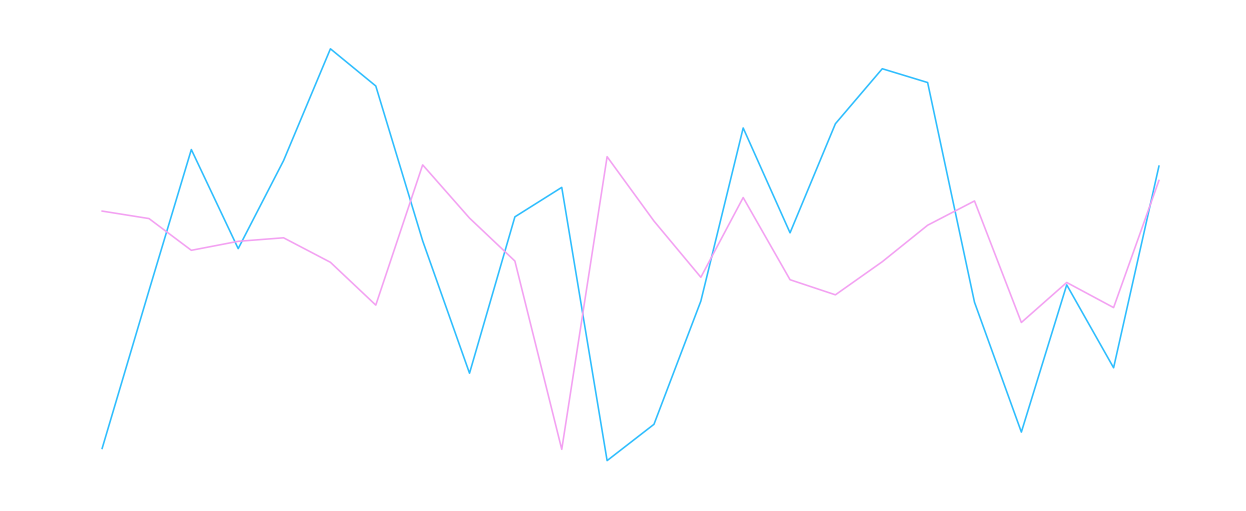

Predicting the carrier PSA Airlines Inc.....
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
METRIC TEMPORAIRE :0.023021820134007037


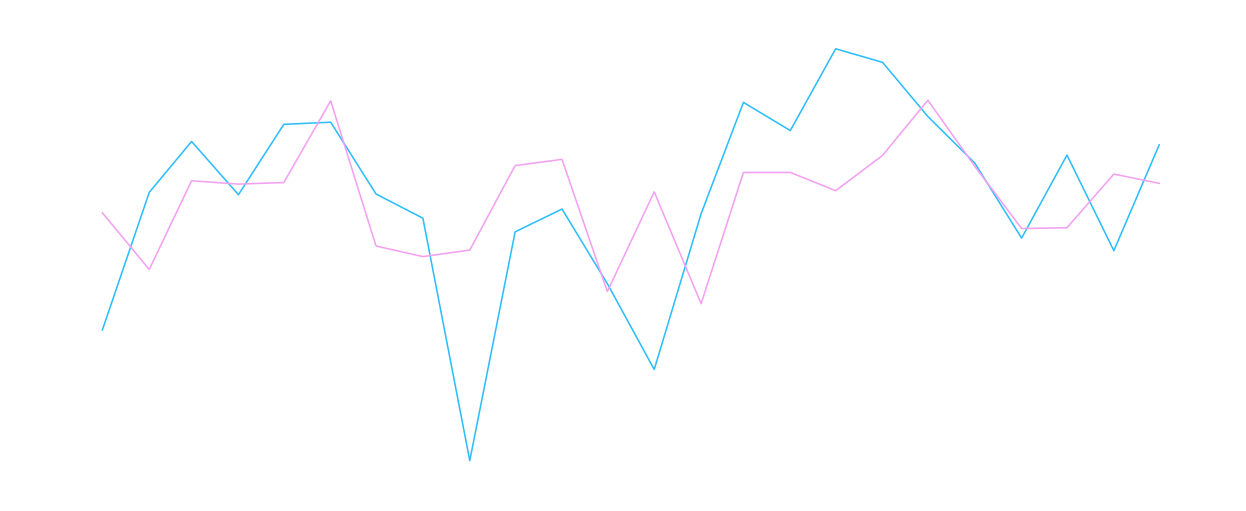

Predicting the carrier Republic Airline....
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
METRIC TEMPORAIRE :0.03297949242219134


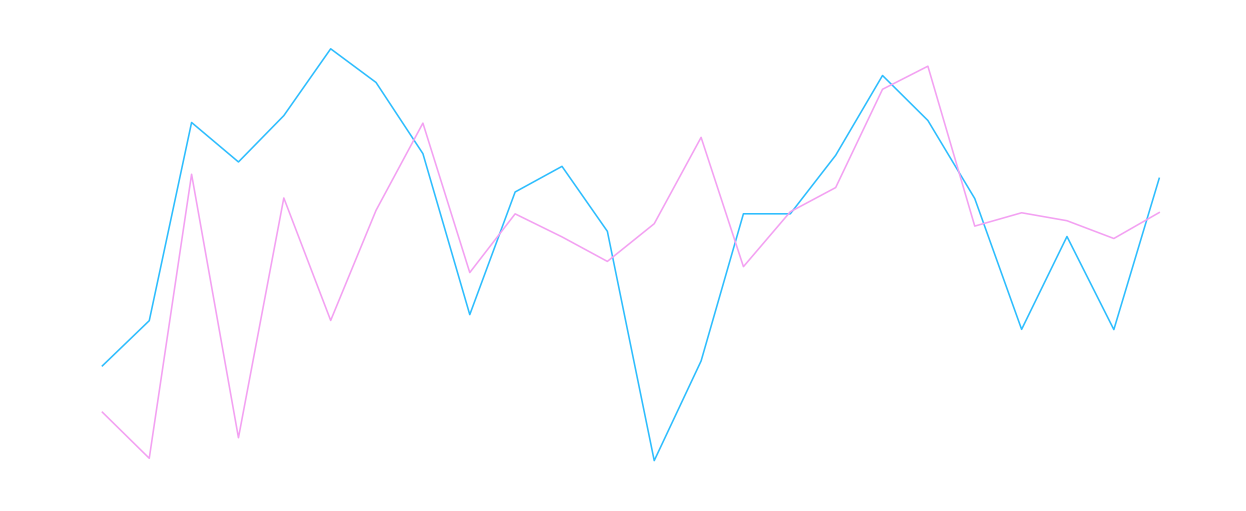

Predicting the carrier Shuttle America Corp.....
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
METRIC TEMPORAIRE :0.06284954210719337


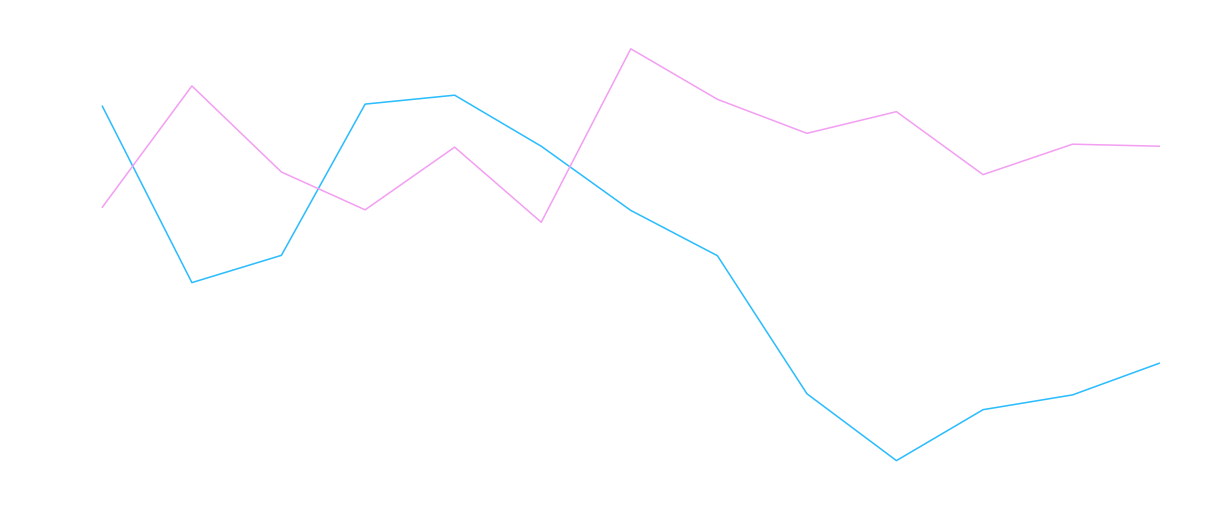

Predicting the carrier SkyWest Airlines Inc.....
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
METRIC TEMPORAIRE :0.023683948621678635


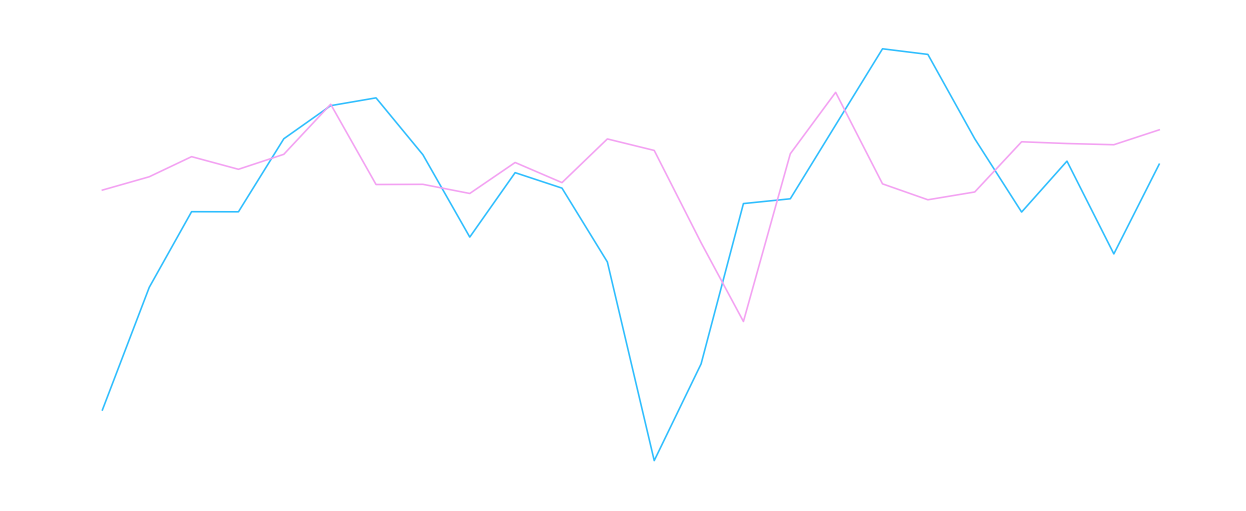

Predicting the carrier Southwest Airlines Co.....
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
METRIC TEMPORAIRE :0.032865713088030685


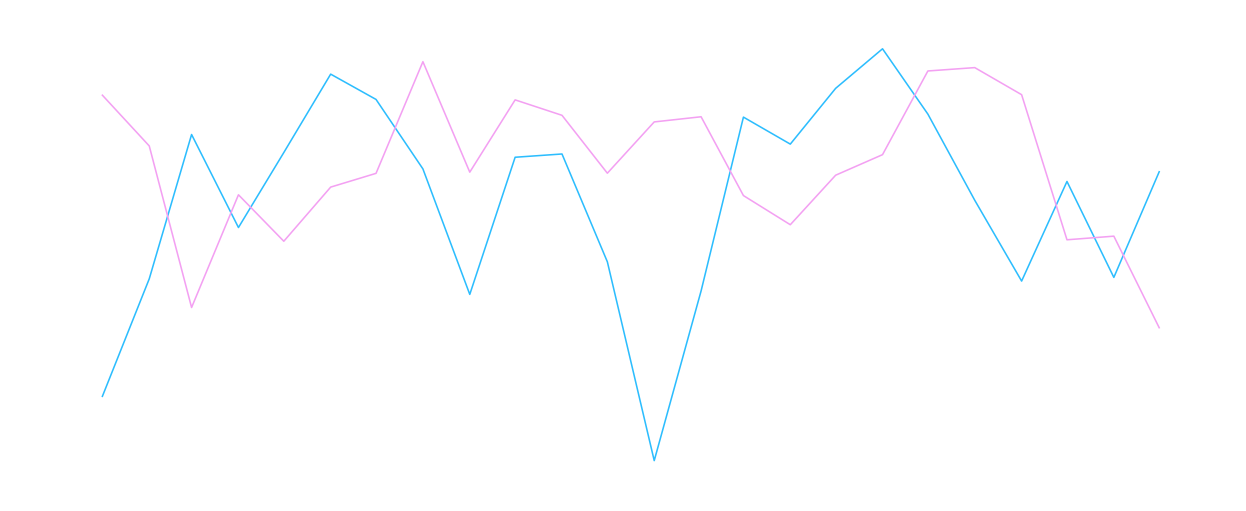

Predicting the carrier Spirit Air Lines....
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
METRIC TEMPORAIRE :0.030535030466831925


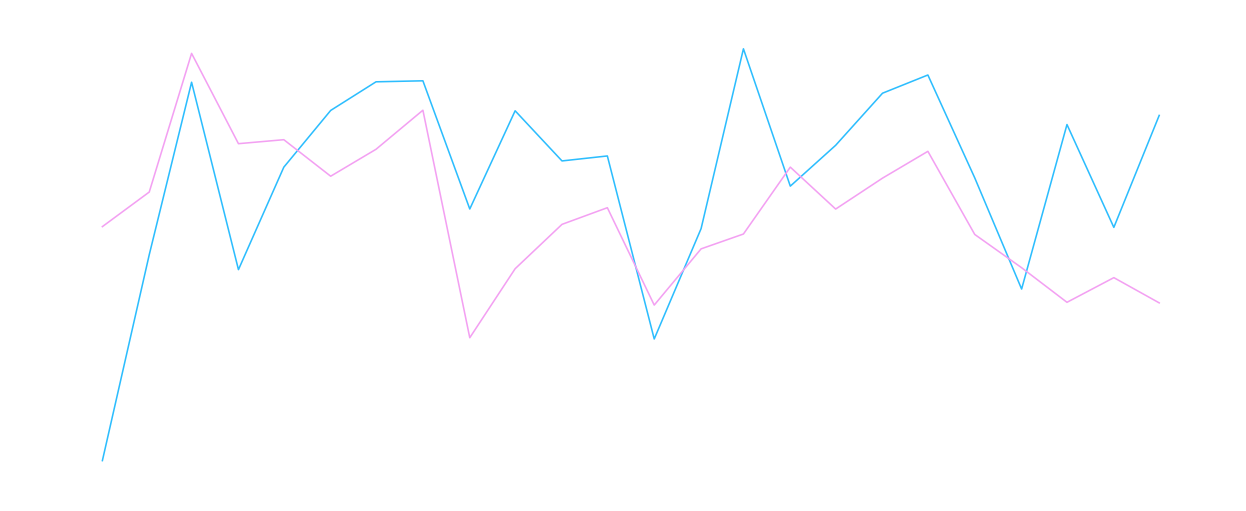

Predicting the carrier Sun Country Airlines d/b/a MN Airlines....
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
METRIC TEMPORAIRE :0.04838769738115909


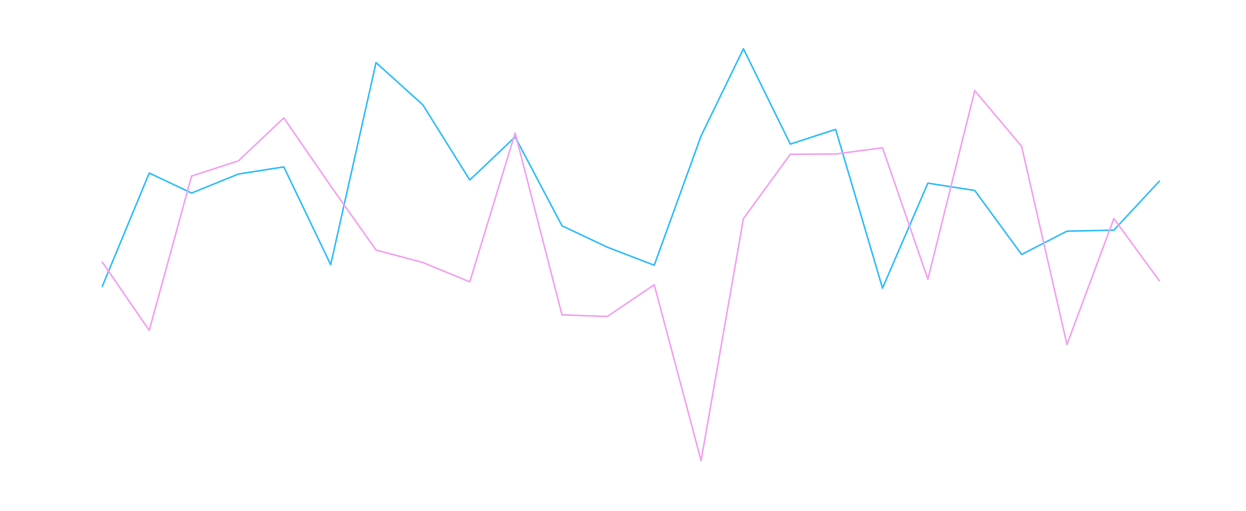

Predicting the carrier United Air Lines Inc.....
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
METRIC TEMPORAIRE :0.023426038419424967


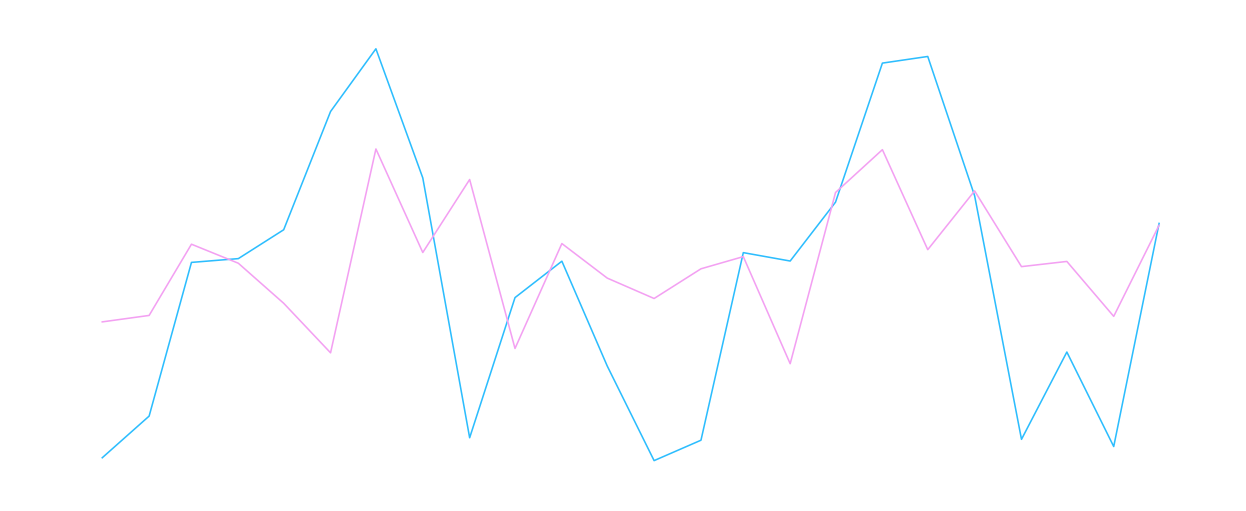

time: 9min 48s (started: 2021-01-11 13:29:42 +00:00)


In [46]:
predictions = LSTM_forecast(dataframe_collection, win_length, batch_size, num_features, model2)

In [ ]:
final_pred = pd.concat(predictions)
final_pred.head()

LOAD_FACTOR      PRED
                            DATE                             
Air Wisconsin Airlines Corp 2018-09-01     0.769966  0.774876
                            2018-10-01     0.806268  0.813643
                            2018-11-01     0.799055  0.824140
                            2018-12-01     0.793741  0.802061
                            2019-01-01     0.735209  0.747367

In [ ]:
final_pred.reset_index(level=0, inplace=True)
final_pred.rename(columns={'level_0': 'UNIQUE_CARRIER_NAME'}, inplace = True)
final_pred.reset_index(level=0, inplace=True)
final_pred.rename(columns={'level_0': 'DATE'}, inplace = True)

In [ ]:
final_pred.head()

,DATE,UNIQUE_CARRIER_NAME,LOAD_FACTOR,PRED
0,2018-09-01,Air Wisconsin Airlines Corp,0.769966,0.774876
1,2018-10-01,Air Wisconsin Airlines Corp,0.806268,0.813643
2,2018-11-01,Air Wisconsin Airlines Corp,0.799055,0.824140
3,2018-12-01,Air Wisconsin Airlines Corp,0.793741,0.802061
4,2019-01-01,Air Wisconsin Airlines Corp,0.735209,0.747367


In [ ]:
mean_absolute_error(final_pred['LOAD_FACTOR'], final_pred['PRED'])

0.031277123380438594